# Data Science and Business Analytics

## Task 2 : Prediction using Unsupervised ML

## Problem Statement :  From the given 'iris' dataset, predict the optimum no. of clusters and represent it visually

## Author : Shivam Deshpande

### Importing Libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### Loading the dataset

In [13]:
iris = pd.read_csv("Iris.csv")
iris.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


### Exploring the Data

In [14]:
iris.shape

(150, 6)

In [16]:
iris.drop("Id", axis=1, inplace=True)
iris.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [19]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [20]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Finding the Optimum no. of clusters using Elbow Method

In [21]:
data = iris.iloc[:, [0,1,2,3]].values

# initializing the matrix of wcss (within cluster sum of squares )
wcss = [] 

# we will iterate k values from 1 to 11
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

### Plotting the curve

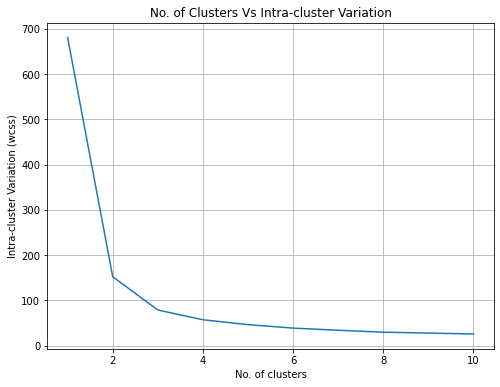

In [36]:
plt.figure(figsize=(8, 6))
plt.plot(range(1,11),wcss)
plt.title("No. of Clusters Vs Intra-cluster Variation")
plt.xlabel("No. of clusters")
plt.ylabel("Intra-cluster Variation (wcss)")
plt.grid(True)
plt.show()

Referring to the above elbow curve, after x=3, the curve is linear.

We can choose the optimum number of clusters as 3

### Applying the algorithm to the dataset

In [37]:
# Now this time we are going to consider the number of clusters as 3
# i.e k=3

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_clusters = kmeans.fit_predict(data)

### Visualizing the clusters graphically

### 1. For Sepal Length and Sepal Width

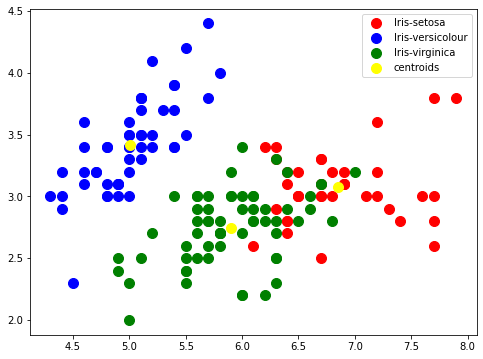

In [42]:
plt.figure(figsize=(8,6))

# Visualizing the clusters
plt.scatter(data[y_clusters == 0, 0], data[y_clusters == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(data[y_clusters == 1, 0], data[y_clusters == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(data[y_clusters == 2, 0], data[y_clusters == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# Visualizing the cluster centres
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s=100, c='yellow', label='centroids')
plt.legend()

### 2. For Petal Length and Petal Width

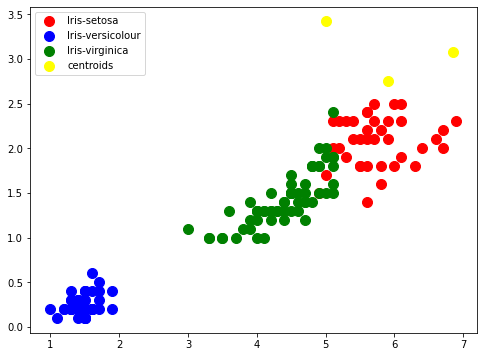

In [43]:
plt.figure(figsize=(8,6))

# Visualizing the clusters
plt.scatter(data[y_clusters == 0, 2], data[y_clusters == 0, 3], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(data[y_clusters == 1, 2], data[y_clusters == 1, 3], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(data[y_clusters == 2, 2], data[y_clusters == 2, 3], s = 100, c = 'green', label = 'Iris-virginica')

# Visualizing the cluster centres
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s=100, c='yellow', label='centroids')
plt.legend()